In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import datetime

##### Color schemes: Data Color Picker from learnui.design, Coolors #####

##### Import the data #####
JC240_data = pd.read_csv('JC240_data.csv')
JC241_data = pd.read_csv('JC241_data.csv')
JC258_data = pd.read_csv('JC258_data.csv')

In [2]:
##### Calculate accuracy for over all sessions for a given animal #####
def get_accuracy(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # concatenate strings
    data_JCxxx = globals()[data_JCxxx] # convert string to variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID")
    sessions = bysession_JCxxx["Session_ID"].unique().to_numpy(dtype=int)
    accuracy = np.zeros(len(sessions))
    for session in range(1, len(sessions)+1):
        accuracy[session-1] = round(bysession_JCxxx.get_group(session)["CorrectBool"].sum() / bysession_JCxxx.get_group(session).count()[0]*100, 0)
    return accuracy, sessions
    
accuracy_JC240, sessions_JC240 = get_accuracy("JC240")
accuracy_JC241, sessions_JC241 = get_accuracy("JC241")
accuracy_JC258, sessions_JC258 = get_accuracy("JC258")

In [3]:
##### Calculate arm choice by session #####
def get_arm_choice(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # concatenate strings for variable name
    data_JCxxx = globals()[data_JCxxx] # convert string to variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID") # filter by session ID and create a groupby object
    sessions = bysession_JCxxx["Session_ID"].unique() # list sessions
    arms = np.array([3, 7, 1]) # list arms of interest
    num_arms = len(arms) # count arms
    arm_choice = np.zeros((len(sessions), num_arms+1)) # make a vector that will hold arm choice for each session
                                                        # and add another column for other arms
    num_trials = np.zeros(len(sessions))
    for session in range(1, len(sessions)+1): # iterate over sessions, starting at 1 instead of 0
        num_trials[session-1] = bysession_JCxxx.get_group(session).count()[0] # count number of trials per session
        for arm in range(num_arms): # iterate over arms by indexing numpy array
            this_session = bysession_JCxxx.get_group(session)
            choices_bool = this_session["Arm"]==(arms[arm]) # Boolean of whether arm was chosen
            count = len(choices_bool[choices_bool==True])
            arm_choice[session-1][arm] = count
        arm_choice[session-1][-1] = num_trials[session-1] - arm_choice[session-1][0] - arm_choice[session-1][1] - arm_choice[session-1][2]
                                    # for last column subtract arms of interest from total trials
    arm_choice = arm_choice / num_trials[:,None] # express arm choice as a proportion of total trials
    return num_trials, arm_choice

num_trials_JC240, arm_choice_JC240 = get_arm_choice("JC240")
num_trials_JC241, arm_choice_JC241 = get_arm_choice("JC241")
num_trials_JC258, arm_choice_JC258 = get_arm_choice("JC258")

In [4]:
##### Calculate performance for each arm #####
def get_arm_accuracy(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # concatenate strings for variable name
    data_JCxxx = globals()[data_JCxxx] # convert string to variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID") # filter by session ID and create a groupby object
    sessions = bysession_JCxxx["Session_ID"].unique().to_numpy(dtype=int) # list sessions
    byarm_JCxxx = data_JCxxx.groupby["Arm"] # filter by arm this time; create another groupby object
    arms = byarm_JCxxx["Arm"].unique().to_numpy(dtype=int) # list unique arms; arm 0 is an incomplete trial
    accuracy = np.zeros(len(sessions), len(arms)) # formerly this was named "arm_accuracy, and corresponded to the commented out block"
    for session in range(1, len(sessions)+1):
#         for arm in range(arms):
#             arm_accuracy[session-1, arm] = round(bysession_JCxxx.get_group(session)["CorrectBool"].sum() / bysession_JCxxx.get_group(session).count())
#             # this won't work because I didn't filter for the arm yet
# I think I can comment this whole block out?
        accuracy[session-1] = round(bysession_JCxxx.get_group(session)["CorrectBool"].sum() / bysession_JCxxx.get_group(session).count()[0]*100, 0)
    return accuracy, sessions

In [5]:
sessions = [1,2,3,4,5,6,7,8]
byarm_JC258 = JC258_data.groupby("Arm")
arms = byarm_JC258["Arm"].unique().to_numpy(dtype=int)
print(type(arms[0]))
# testvec = np.zeros([len(sessions), len(arms)])

# for session in range(1, len(sessions)+1):
#     for arm in range(arms):
#         testvec[session, arm] = arm

<class 'numpy.int32'>


In [6]:
# This is now unnecessary, because I simply removed the data that was an issue. Must fix later.
# ##### MANUALLY HARD CODING, FIX LATER #####
# # Accuracy is incorrect for day 12 because 3rd flavor was only introduced later
# accuracy_JC241[13] = 63
# print(accuracy_JC241[13])

# Manually deleted forced choice trials
# # Accuracy is incorrect for JC258 due to forced choice trial
# accuracy_JC258[10] = int(30/69*100)
# accuracy_JC258[11] = int(33/69*100)
# accuracy_JC258[12] = int(2/6*100)
# accuracy_JC258[13] = int(19/49*100)

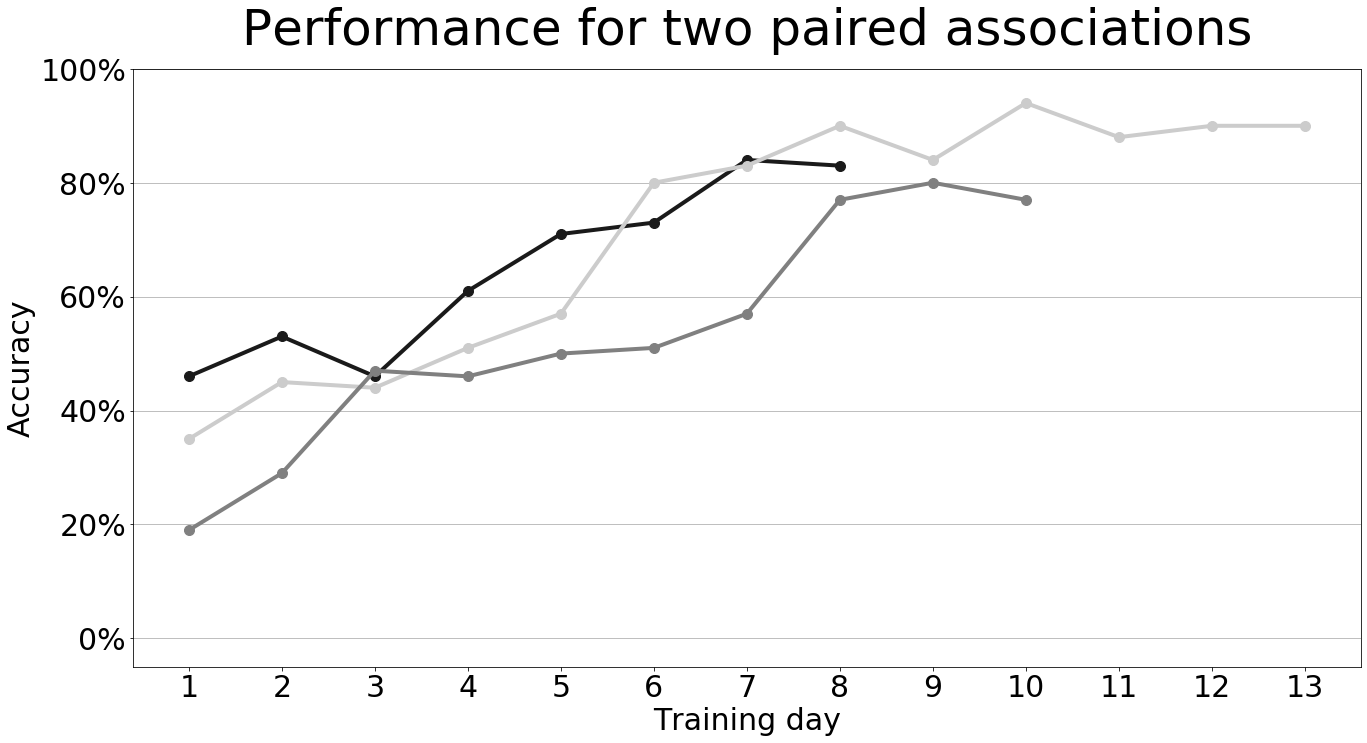

In [7]:
##### Plot performance and arm choice for two paired associations #####
fig = plt.figure(figsize=(22,11))
plt.tight_layout()

##### Colorscheme: JC240-2, JC241-2, JC258-2, JC240-3, JC241-3, JC258-3 #####
cscheme = ["#003f5c", "#769dbc","#b7dcfb", "#bc5090", "#db8eb8", "#f7cbe2"]
cscheme = ["0.1", "0.5","0.8", "#003f5c", "#769dbc","#b7dcfb"]

##### Line plot format #####
# ### Default ###
# linefmt = 2
# markerfmt = 5
### large ###
linefmt = 4 
markerfmt = 10

##### Plot performance #####
ax1 = fig.add_subplot(111)

##### JC240 #####
ax1.plot(sessions_JC240[0:8], accuracy_JC240[0:8], color=cscheme[0], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors

##### JC241 #####
ax1.plot(sessions_JC241[0:13], accuracy_JC241[0:13], color=cscheme[2], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors

##### JC258 #####
ax1.plot(sessions_JC258[0:10], accuracy_JC258[0:10], color=cscheme[1], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors

# ##### Formatting #####
# ax1.set_title("Performance for two paired associations", fontsize=26,y=1.03)
# ax1.tick_params(labelsize=15)
# ax1.set_xlabel("Training day", fontsize=15)
# ax1.set_ylabel("Accuracy", fontsize=15)
# # ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
# ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax1.set_ylim(-5,100)
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax1.yaxis.grid()
# # ax1.margins(x=0.05)

##### Formatting large #####
ax1.set_title("Performance for two paired associations", fontsize=50,y=1.03)
ax1.tick_params(labelsize=30)
ax1.set_xlabel("Training day", fontsize=30)
ax1.set_ylabel("Accuracy", fontsize=30)
# ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax1.set_ylim(-5,100)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax1.yaxis.grid()
# ax1.margins(x=0.05)

# ##### Legend #####
# twoChoice = mpatches.Patch(color=cscheme[0], label = '2-choice')
# threeChoice = mpatches.Patch(color=cscheme[2], label = '3-choice')
# ax1.legend(handles=[twoChoice, threeChoice], loc=4, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)

plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")
# plt.savefig("Performance 2 pairs "+timestamp+".png")

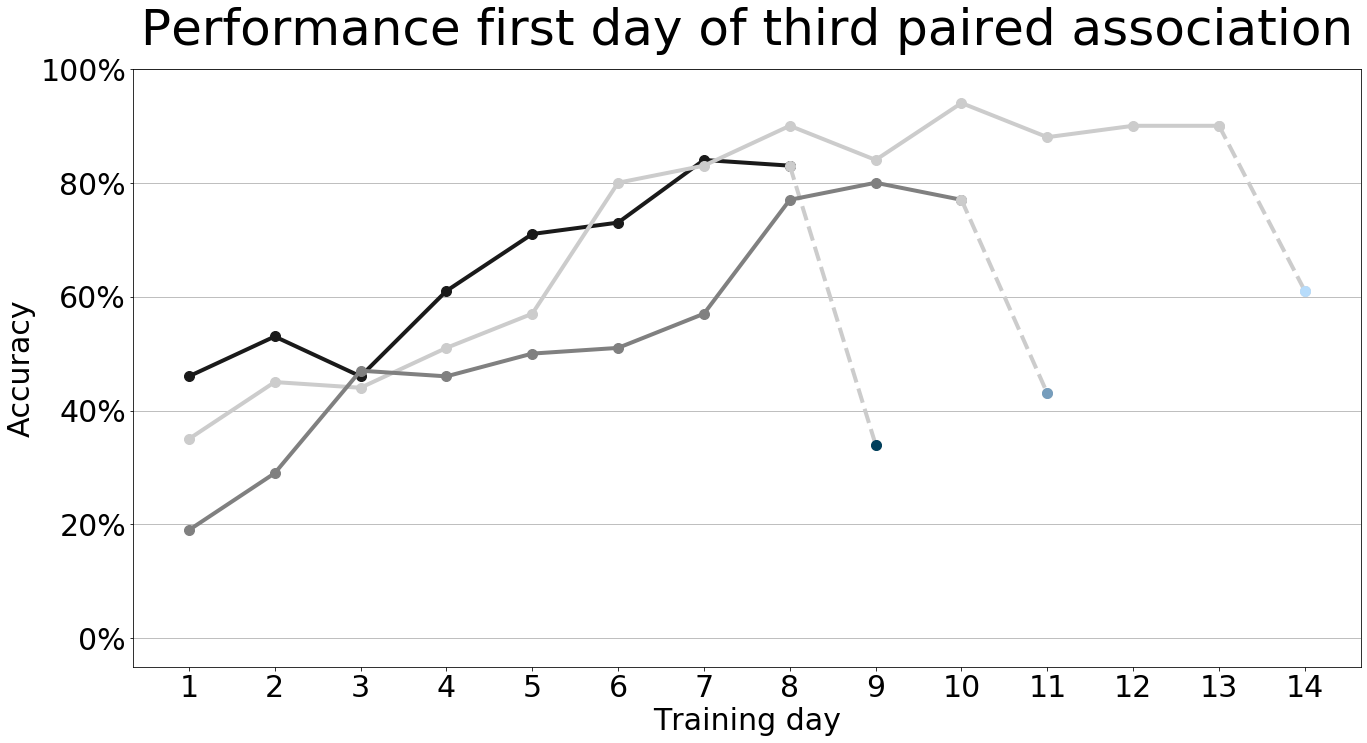

In [8]:
##### Plot performance and arm choice day after after 3rd paired association #####
fig = plt.figure(figsize=(22,11))
plt.tight_layout()

##### Subplot 1 #####
##### Plot performance #####
ax1 = fig.add_subplot(111)

##### Line plot format #####
# ### Default ###
# linefmt = 2
# markerfmt = 5
### large ###
linefmt = 4 
markerfmt = 10

##### JC240 #####
ax1.plot(sessions_JC240[0:8], accuracy_JC240[0:8], color=cscheme[0], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors
ax1.plot(sessions_JC240[7:9], accuracy_JC240[7:9], color='0.8', linewidth=linefmt, ls='--', marker='o', markersize=markerfmt) # gray line
ax1.plot(sessions_JC240[8:9], accuracy_JC240[8:9], color=cscheme[3], linewidth=linefmt, marker='o', markersize=markerfmt) # only first day after introducing 3rd flavor

##### JC241 #####
ax1.plot(sessions_JC241[0:13], accuracy_JC241[0:13], color=cscheme[2], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors
ax1.plot(sessions_JC241[12:14], accuracy_JC241[12:14], color='0.8', linewidth=linefmt, ls='--', marker='o', markersize=markerfmt) # gray line
ax1.plot(sessions_JC241[13:14], accuracy_JC241[13:14], color=cscheme[5], linewidth=linefmt, marker='o', markersize=markerfmt) # only first day after introducing 3rd flavor

##### JC258 #####
ax1.plot(sessions_JC258[0:10], accuracy_JC258[0:10], color=cscheme[1], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors
ax1.plot(sessions_JC258[9:11], accuracy_JC258[9:11], color='0.8', linewidth=linefmt, ls='--', marker='o', markersize=markerfmt) # gray line
ax1.plot(sessions_JC258[10:11], accuracy_JC258[10:11], color=cscheme[4], linewidth=linefmt, marker='o', markersize=markerfmt) # only first day after introducing 3rd flavor

# ##### Formatting #####
# ax1.set_title("Performance first day of third paired association", fontsize=26,y=1.03)
# ax1.tick_params(labelsize=15)
# ax1.set_xlabel("Training day", fontsize=15)
# ax1.set_ylabel("Accuracy", fontsize=15)
# # ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
# ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax1.set_ylim(-5,100)
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax1.yaxis.grid()
# # ax1.margins(x=0.05)

##### Formatting large #####
ax1.set_title("Performance first day of third paired association", fontsize=50,y=1.03)
ax1.tick_params(labelsize=30)
ax1.set_xlabel("Training day", fontsize=30)
ax1.set_ylabel("Accuracy", fontsize=30)
# ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax1.set_ylim(-5,100)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax1.yaxis.grid()
# ax1.margins(x=0.05)

##### Legend #####
# twoChoice = mpatches.Patch(color=cscheme[0], label = '2-choice')
# threeChoice = mpatches.Patch(color=cscheme[2], label = '3-choice')
# ax1.legend(handles=[twoChoice, threeChoice], loc=4, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)

plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")
# plt.savefig("Performance 3 pairs day one "+timestamp+".png")

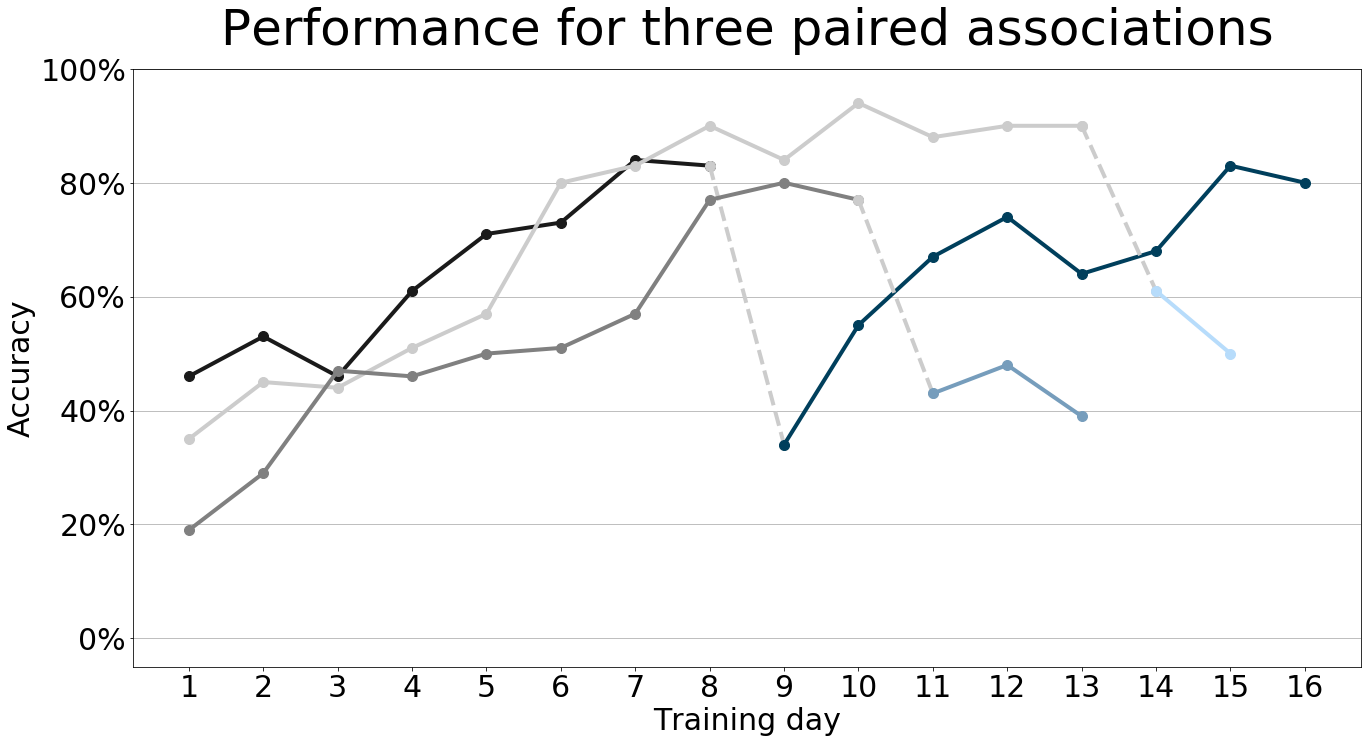

In [9]:
##### Plot accuracy and arm choice before and after third paired association introduced #####
fig = plt.figure(figsize=(22,11))
plt.tight_layout()

##### Colorscheme: empty, 2-choice, 3-choice, empty #####
# cscheme = ['#264653','#2a9d8f','0.9','#7a5195','#ffa600'] # Data Color Picker 1
# cscheme = ['#003f5c', '#58508d', '#bc5090', '#ff6361','#ffa600'] # Data Color Picker 2
# cscheme = ["#264653","#2a9d8f", "#e9c46a","#b7410e"] # Coolors, modified
# cscheme = ['#1b9e77','#d95f02','0.9','#7570b3','#e7298a'] # Colorbrewer

##### Plot accuracy #####
ax1 = fig.add_subplot(111)

##### Line plot format #####
# ### Default ###
# linefmt = 2
# markerfmt = 5
### large ###
linefmt = 4 
markerfmt = 10

##### JC240 #####
ax1.plot(sessions_JC240[0:8], accuracy_JC240[0:8], color=cscheme[0], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors
# ax1.plot(sessions_JC240[7:16], accuracy_JC240[7:16], color=cscheme[2], linewidth=linefmt, marker='o', markersize=markerfmt) # 3 flavors with connecting line
ax1.plot(sessions_JC240[7:9], accuracy_JC240[7:9], color='0.8', linewidth=linefmt, ls='--', marker='o', markersize=markerfmt) # gray line
ax1.plot(sessions_JC240[8:16], accuracy_JC240[8:16], color=cscheme[3], linewidth=linefmt, marker='o', markersize=markerfmt) # 3 flavors without line

##### JC241 #####
ax1.plot(sessions_JC241[0:13], accuracy_JC241[0:13], color=cscheme[2], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors
# ax1.plot(sessions_JC241[12:16], accuracy_JC241[12:16], color=cscheme[2], linewidth=linefmt, marker='o', markersize=markerfmt) # 3 flavors with connecting line
ax1.plot(sessions_JC241[12:14], accuracy_JC241[12:14], color='0.8', linewidth=linefmt, ls='--', marker='o', markersize=markerfmt) # gray line
ax1.plot(sessions_JC241[13:16], accuracy_JC241[13:16], color=cscheme[5], linewidth=linefmt, marker='o', markersize=markerfmt) # 3 flavors without line

##### JC258 #####
ax1.plot(sessions_JC258[0:10], accuracy_JC258[0:10], color=cscheme[1], linewidth=linefmt, marker='o', markersize=markerfmt) # 2 flavors
ax1.plot(sessions_JC258[9:11], accuracy_JC258[9:11], color='0.8', linewidth=linefmt, ls='--', marker='o', markersize=markerfmt) # gray line
ax1.plot(sessions_JC258[10:14], accuracy_JC258[10:14], color=cscheme[4], linewidth=linefmt, marker='o', markersize=markerfmt) # 3 flavors without line

# ##### Formatting #####
# ax1.set_title("Performance for three paired associations", fontsize=26,y=1.03)
# ax1.tick_params(labelsize=15)
# ax1.set_xlabel("Training day", fontsize=15)
# ax1.set_ylabel("Accuracy", fontsize=15)
# # ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
# ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax1.set_ylim(-5,100)
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax1.yaxis.grid()
# # ax1.margins(x=0.05)

##### Formatting large #####
ax1.set_title("Performance for three paired associations", fontsize=50,y=1.03)
ax1.tick_params(labelsize=30)
ax1.set_xlabel("Training day", fontsize=30)
ax1.set_ylabel("Accuracy", fontsize=30)
# ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax1.set_ylim(-5,100)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax1.yaxis.grid()
# ax1.margins(x=0.05)

##### Legend #####
# twoChoice = mpatches.Patch(color=cscheme[0], label = '2-choic')
# threeChoice = mpatches.Patch(color=cscheme[2], label = '3-choice')
# ax1.legend(handles=[twoChoice, threeChoice], loc=4, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)

plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")
# plt.savefig("Performance 3 pairs "+timestamp+".png")

In [10]:
# Compute statistics
accuracy_mean = np.mean([accuracy_JC240[0:8], accuracy_JC241[0:8]], axis=0)
accuracy_sem = stats.sem([accuracy_JC240[0:8], accuracy_JC241[0:8]], axis=0)

arm_choice_mean = np.mean([arm_choice_JC240[0:8], arm_choice_JC241[0:8]], axis=0)
arm_choice_sem = stats.sem([arm_choice_JC240[0:8], arm_choice_JC241[0:8]], axis=0)

[[0.53846154 0.19230769 0.07692308 0.19230769]
 [0.39473684 0.42105263 0.         0.18421053]
 [0.64       0.26       0.         0.1       ]
 [0.51428571 0.44285714 0.         0.04285714]
 [0.32857143 0.67142857 0.         0.        ]
 [0.62857143 0.37142857 0.         0.        ]
 [0.45714286 0.54285714 0.         0.        ]
 [0.44285714 0.55714286 0.         0.        ]
 [0.53571429 0.375      0.         0.08928571]
 [0.34782609 0.50724638 0.01449275 0.13043478]
 [0.43478261 0.44927536 0.01449275 0.10144928]
 [0.36231884 0.33333333 0.17391304 0.13043478]
 [0.27536232 0.23188406 0.43478261 0.05797101]
 [0.31884058 0.28985507 0.36231884 0.02898551]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.31884058 0.34782609 0.        ]]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


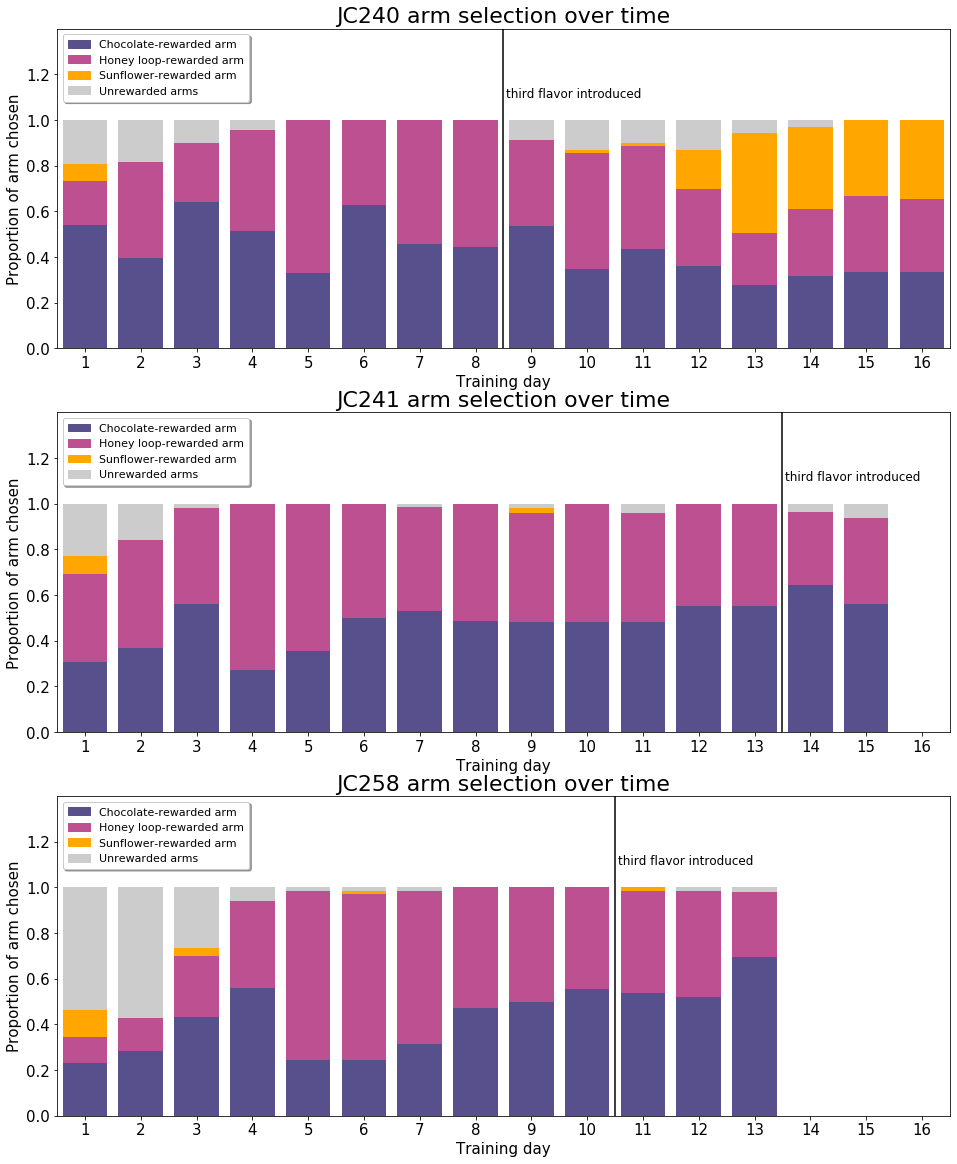

In [11]:
# Plot arm choice
fig = plt.figure(figsize=(16,20))

##### JC240 #####
print(arm_choice_JC240)
print(sessions_JC240)
ax1 = fig.add_subplot(311)
ax1.bar(sessions_JC240, arm_choice_JC240[:,0], color='#58508d')
ax1.bar(sessions_JC240, arm_choice_JC240[:,1], color='#bc5090', bottom=arm_choice_JC240[:,0])
ax1.bar(sessions_JC240, arm_choice_JC240[:,2], color='#ffa600', bottom=arm_choice_JC240[:,0]+arm_choice_JC240[:,1])
ax1.bar(sessions_JC240, arm_choice_JC240[:,3], color='0.8', bottom=arm_choice_JC240[:,0]+arm_choice_JC240[:,1]+arm_choice_JC240[:,2])

ax1.axvline(x=8.5, color='k') # start of schema learning
ax1.text(8.55, 1.1, "third flavor introduced", fontsize=12)

##### JC240 formatting #####
ax1.set_title("JC240 arm selection over time", fontsize=22)
ax1.tick_params(labelsize=15)
ax1.set_xlabel("Training day", fontsize=15)
ax1.set_ylabel("Proportion of arm chosen", fontsize=15)
ax1.set_xlim(0.5,16.5)
ax1.set_ylim(0,1.4)
ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax1.yaxis.set_ticks(np.arange(0,1.4,0.2))
ax1.margins(y=0.2) # margins to make room for the legend
# Legend
chocolate_arm = mpatches.Patch(color='#58508d', label = 'Chocolate-rewarded arm')
honey_arm = mpatches.Patch(color='#bc5090', label = 'Honey loop-rewarded arm')
sunflower_arm = mpatches.Patch(color='#ffa600', label = 'Sunflower-rewarded arm')
other_arms = mpatches.Patch(color='0.8', label = 'Unrewarded arms')
ax1.legend(handles=[chocolate_arm, honey_arm, sunflower_arm, other_arms], loc=2, fontsize=11, fancybox=True, shadow=1, borderpad=0.5)


##### JC241 #####
ax2 = fig.add_subplot(312)
ax2.bar(sessions_JC241, arm_choice_JC241[:,0], color="#58508d")
ax2.bar(sessions_JC241, arm_choice_JC241[:,1], color='#bc5090', bottom=arm_choice_JC241[:,0])
ax2.bar(sessions_JC241, arm_choice_JC241[:,2], color='#ffa600', bottom=arm_choice_JC241[:,0]+arm_choice_JC241[:,1])
ax2.bar(sessions_JC241, arm_choice_JC241[:,3], color='0.8', bottom=arm_choice_JC241[:,0]+arm_choice_JC241[:,1]+arm_choice_JC241[:,2])
ax2.axvline(x=13.5, color='k') # start of schema learning
ax2.text(13.55, 1.1, "third flavor introduced", fontsize=12)

##### JC241 formatting #####
ax2.set_title("JC241 arm selection over time", fontsize=22)
ax2.tick_params(labelsize=15)
ax2.set_xlabel("Training day", fontsize=15)
ax2.set_ylabel("Proportion of arm chosen", fontsize=15)
ax2.set_xlim(0.5,16.5)
ax2.set_ylim(0,1.4)
ax2.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax2.yaxis.set_ticks(np.arange(0,1.4,0.2))
ax2.margins(y=0.2) # margins to make room for the legend
# Legend
ax2.legend(handles=[chocolate_arm, honey_arm, sunflower_arm, other_arms], loc=2, fontsize=11, fancybox=True, shadow=1, borderpad=0.5)

##### JC258 #####
ax3 = fig.add_subplot(313)
ax3.bar(sessions_JC258, arm_choice_JC258[:,0], color="#58508d")
ax3.bar(sessions_JC258, arm_choice_JC258[:,1], color='#bc5090', bottom=arm_choice_JC258[:,0])
ax3.bar(sessions_JC258, arm_choice_JC258[:,2], color='#ffa600', bottom=arm_choice_JC258[:,0]+arm_choice_JC258[:,1])
ax3.bar(sessions_JC258, arm_choice_JC258[:,3], color='0.8', bottom=arm_choice_JC258[:,0]+arm_choice_JC258[:,1]+arm_choice_JC258[:,2])
ax3.axvline(x=10.5, color='k') # start of schema learning
ax3.text(10.55, 1.1, "third flavor introduced", fontsize=12)

##### JC258 formatting #####
ax3.set_title("JC258 arm selection over time", fontsize=22)
ax3.tick_params(labelsize=15)
ax3.set_xlabel("Training day", fontsize=15)
ax3.set_ylabel("Proportion of arm chosen", fontsize=15)
ax3.set_xlim(0.5,16.5)
ax3.set_ylim(0,1.4)
ax3.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax3.yaxis.set_ticks(np.arange(0,1.4,0.2))
ax3.margins(y=0.2) # margins to make room for the legend
# Legend
ax3.legend(handles=[chocolate_arm, honey_arm, sunflower_arm, other_arms], loc=2, fontsize=11, fancybox=True, shadow=1, borderpad=0.5)

plt.show()
# plt.savefig("Arm selection over time "+timestamp+".jpg")

In [12]:
##### Calculate performance by flavor #####
def get_flavor_accuracy(JCxxx, third_flavor_introduced): # hard coded variable that tells me on which session the third flavor gets introduced
                                                            # for JC240 it's 9
    data_JCxxx = str(JCxxx) + "_data" # concatenate strings for variable name
    data_JCxxx = globals()[data_JCxxx] # convert string to variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID") # filter by session ID and create a groupby object
    sessions = bysession_JCxxx["Session_ID"]  # list sessions
    
    byflavor_JCxxx = data_JCxxx.groupby("Flavor") # filter by flavor this time; create another groupby object
#     flavors = byflavor_JCxxx["Flavor"].unique() # list unique flavors
    flavors = ['C', 'H', 'S'] # hard coding for now :(
    flavor_accuracy = np.zeros((len(sessions), len(flavors))) # predefine a 16x3 array that will plot accuracy for 16 sessions and 3 flavors
    
    byboth_JCxxx = data_JCxxx.groupby(["Session_ID", "Flavor"]) # filter by both session and flavor; create a combined groupby object
    
#     # generate output of the groupby object
#     for group_key, group_value in byboth_JCxxx:
#         print(group_key, group_value)
#         group = byboth_JCxxx.get_group(group_key)
#         print(group)
        
    for session in range(1, len(sessions)+1):
        for flavor in range(len(flavors)-1): # only works for C and H for now
            correct_trials = byboth_JCxxx.get_group((session, flavors[flavor]))["CorrectBool"].sum() 
            total_trials = byboth_JCxxx.get_group((session, flavors[flavor]))["CorrectBool"].count()
            acc = correct_trials / total_trials
            flavor_accuracy[session-1][flavor] = round(acc, 2)*100
#             round(bysession_JCxxx.get_group(session)["CorrectBool"].sum() / bysession_JCxxx.get_group(session).count()[0]*100, 0)
        # hard code third flavor
        if session > third_flavor_introduced-1:
            correct_trials = byboth_JCxxx.get_group((session, flavors[2]))["CorrectBool"].sum()
            total_trials = byboth_JCxxx.get_group((session, flavors[flavor]))["CorrectBool"].count()
            acc = correct_trials / total_trials
            flavor_accuracy[session-1][2] = round(acc, 2)*100
    return flavor_accuracy

third_flv_sess_JC240 = 9
flavor_accuracy_JC240 = get_flavor_accuracy("JC240", third_flv_sess_JC240)

third_flv_sess_JC241 = 14
flavor_accuracy_JC241 = get_flavor_accuracy("JC241", third_flv_sess_JC241)

third_flv_sess_JC258 = 11
flavor_accuracy_JC258 = get_flavor_accuracy("JC258", third_flv_sess_JC258)

print(flavor_accuracy_JC240)

[[ 69.  23.   0.]
 [ 53.  53.   0.]
 [ 64.  28.   0.]
 [ 66.  57.   0.]
 [ 54.  89.   0.]
 [ 86.  60.   0.]
 [ 80.  89.   0.]
 [ 77.  89.   0.]
 [ 92.  54.   0.]
 [ 82.  86.   5.]
 [ 96. 100.   4.]
 [ 91.  87.  43.]
 [ 70.  52.  70.]
 [ 74.  71.  71.]
 [ 78.  91.  78.]
 [ 74.  95.  86.]]


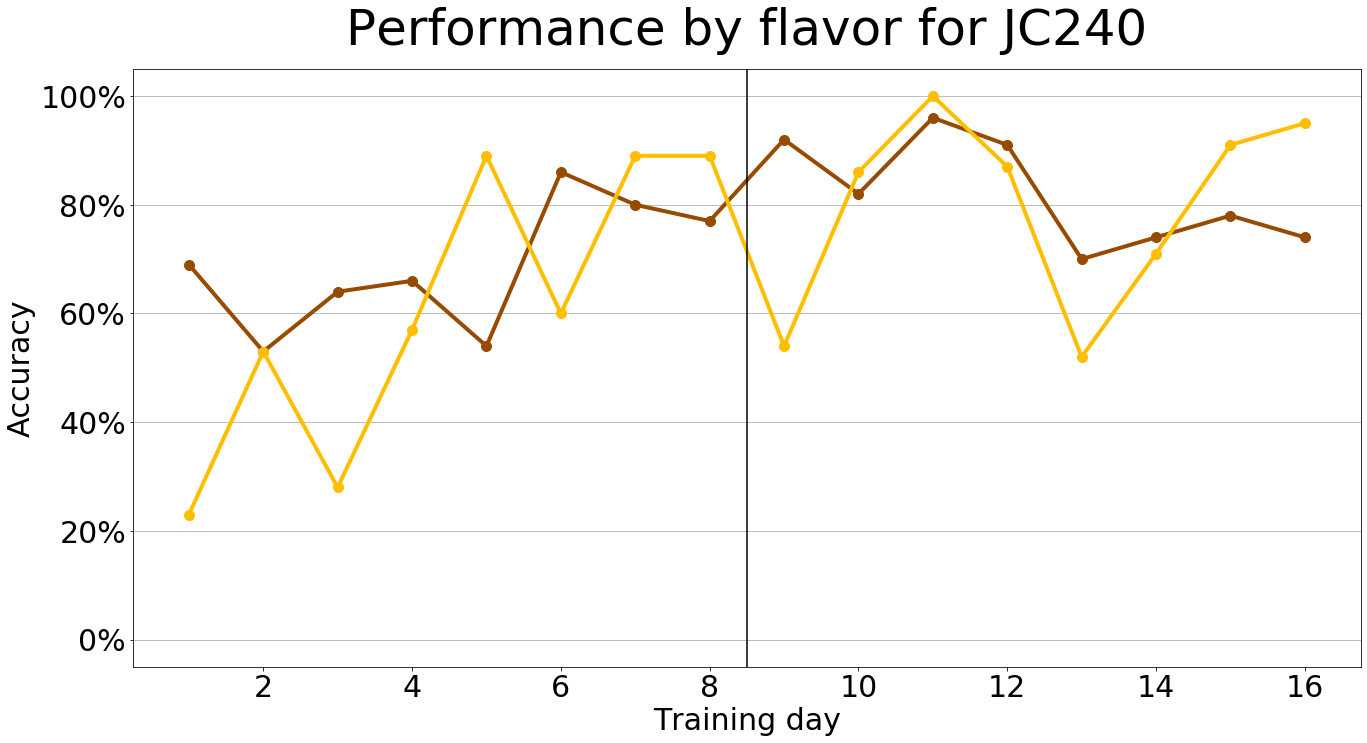

In [13]:
##### Plot accuracy by flavor #####
fig = plt.figure(figsize=(22,11))
plt.tight_layout()
ax = fig.add_subplot(111)

##### Line plot format #####
# ### Default ###
# linefmt = 2
# markerfmt = 5
### large ###
linefmt = 4 
markerfmt = 10

##### JC240 #####
ax.plot(sessions_JC240, flavor_accuracy_JC240[:, 0], color='#964B00', linewidth=linefmt, marker='o', markersize=markerfmt) # chocolate
ax.plot(sessions_JC240, flavor_accuracy_JC240[:, 1], color='#FFBF00', linewidth=linefmt, marker='o', markersize=markerfmt) # honey
# ax.plot(sessions_JC240[third_flv_sess_JC240-1:-1], flavor_accuracy_JC240[third_flv_sess_JC240-1:-1, 2], color='#CFB997', linewidth=linefmt, marker='o', markersize=markerfmt) # sunflower
#             # for some reason the last day isn't getting plotted
ax.axvline(x=third_flv_sess_JC240-0.5, color='k') # start of schema learning

# ##### Formatting #####
# ax1.set_title("Performance for three paired associations", fontsize=26,y=1.03)
# ax1.tick_params(labelsize=15)
# ax1.set_xlabel("Training day", fontsize=15)
# ax1.set_ylabel("Accuracy", fontsize=15)
# # ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
# ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax1.set_ylim(-5,100)
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax1.yaxis.grid()
# # ax1.margins(x=0.05)

##### Formatting large #####
ax.set_title("Performance by flavor for JC240", fontsize=50,y=1.03)
ax.tick_params(labelsize=30)
ax.set_xlabel("Training day", fontsize=30)
ax.set_ylabel("Accuracy", fontsize=30)
# ax.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax.set_ylim(-5,105)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.grid()
# ax.margins(x=0.05)

##### Legend #####
# twoChoice = mpatches.Patch(color=cscheme[0], label = '2-choice')
# threeChoice = mpatches.Patch(color=cscheme[2], label = '3-choice')
# ax1.legend(handles=[twoChoice, threeChoice], loc=4, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)

plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")
# plt.savefig("Performance by flavor JC240 "+timestamp+".png")

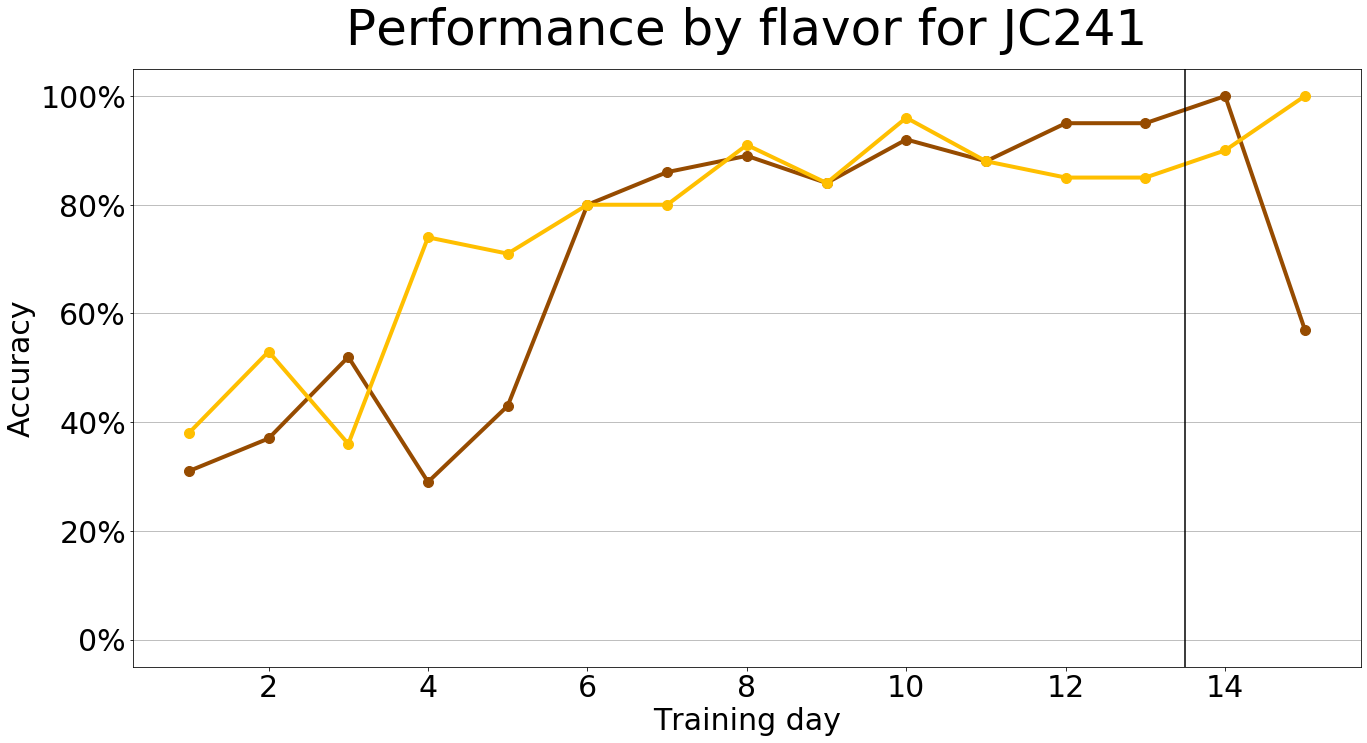

In [14]:
##### Plot accuracy by flavor #####
fig = plt.figure(figsize=(22,11))
plt.tight_layout()
ax = fig.add_subplot(111)

##### Line plot format #####
# ### Default ###
# linefmt = 2
# markerfmt = 5
### large ###
linefmt = 4 
markerfmt = 10

##### JC241 #####
ax.plot(sessions_JC241, flavor_accuracy_JC241[:, 0], color='#964B00', linewidth=linefmt, marker='o', markersize=markerfmt) # chocolate
ax.plot(sessions_JC241, flavor_accuracy_JC241[:, 1], color='#FFBF00', linewidth=linefmt, marker='o', markersize=markerfmt) # honey
# ax.plot(sessions_JC241[third_flv_sess_JC241-1:-1], flavor_accuracy_JC241[third_flv_sess_JC241-1:-1, 2], color='#CFB997', linewidth=linefmt, marker='o', markersize=markerfmt) # sunflower
#             # for some reason the last day isn't getting plotted
ax.axvline(x=third_flv_sess_JC241-0.5, color='k') # start of schema learning

# ##### Formatting #####
# ax1.set_title("Performance for three paired associations", fontsize=26,y=1.03)
# ax1.tick_params(labelsize=15)
# ax1.set_xlabel("Training day", fontsize=15)
# ax1.set_ylabel("Accuracy", fontsize=15)
# # ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
# ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax1.set_ylim(-5,100)
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax1.yaxis.grid()
# # ax1.margins(x=0.05)

##### Formatting large #####
ax.set_title("Performance by flavor for JC241", fontsize=50,y=1.03)
ax.tick_params(labelsize=30)
ax.set_xlabel("Training day", fontsize=30)
ax.set_ylabel("Accuracy", fontsize=30)
# ax.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax.set_ylim(-5,105)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.grid()
# ax.margins(x=0.05)

##### Legend #####
# twoChoice = mpatches.Patch(color=cscheme[0], label = '2-choice')
# threeChoice = mpatches.Patch(color=cscheme[2], label = '3-choice')
# ax1.legend(handles=[twoChoice, threeChoice], loc=4, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)

plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")
# plt.savefig("Performance by flavor JC241 "+timestamp+".png")

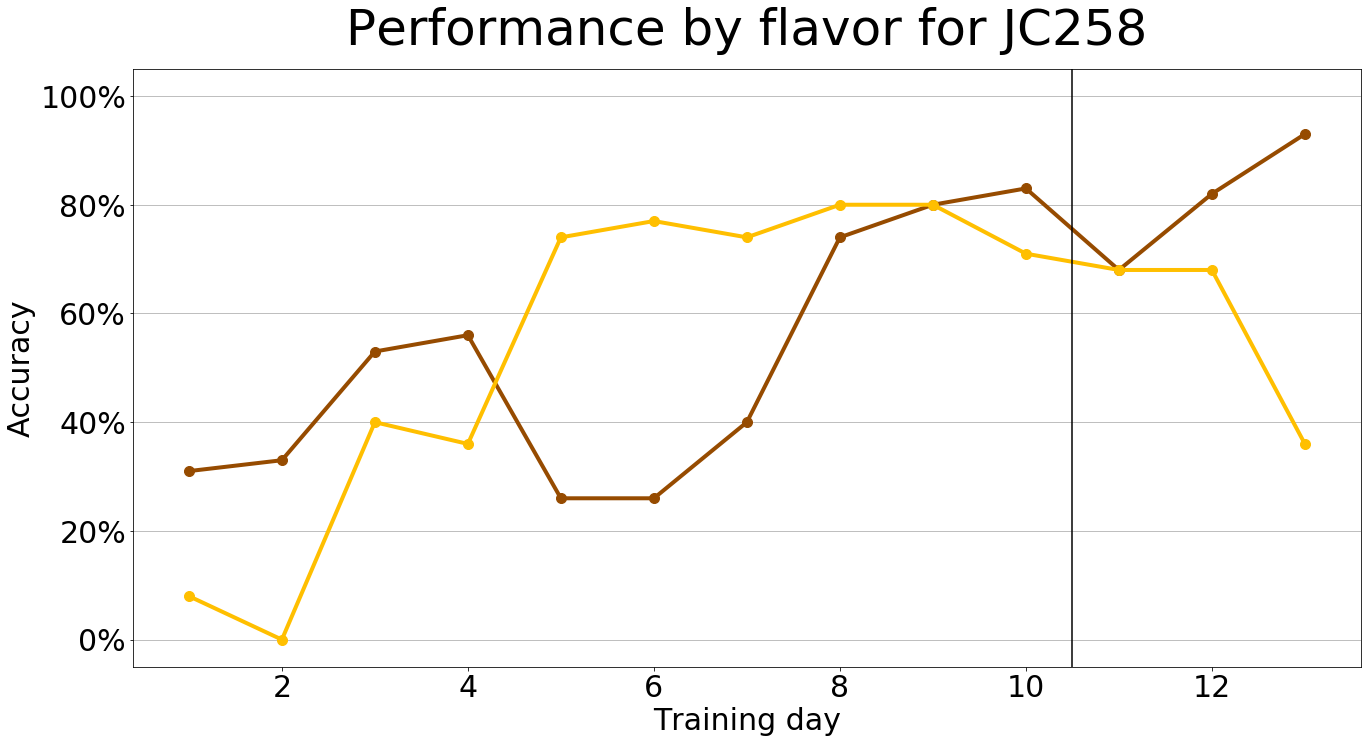

In [15]:
##### Plot accuracy by flavor #####
fig = plt.figure(figsize=(22,11))
plt.tight_layout()
ax = fig.add_subplot(111)

##### Line plot format #####
# ### Default ###
# linefmt = 2
# markerfmt = 5
### large ###
linefmt = 4 
markerfmt = 10

##### JC258 #####
ax.plot(sessions_JC258, flavor_accuracy_JC258[:, 0], color='#964B00', linewidth=linefmt, marker='o', markersize=markerfmt) # chocolate
ax.plot(sessions_JC258, flavor_accuracy_JC258[:, 1], color='#FFBF00', linewidth=linefmt, marker='o', markersize=markerfmt) # honey
# ax.plot(sessions_JC258[third_flv_sess_JC258:-1], flavor_accuracy_JC258[third_flv_sess_JC258:-1, 2], color='#CFB997', linewidth=linefmt, marker='o', markersize=markerfmt) # sunflower
#             # for some reason the last day isn't getting plotted
ax.axvline(x=third_flv_sess_JC258-0.5, color='k') # start of schema learning

# ##### Formatting #####
# ax1.set_title("Performance for three paired associations", fontsize=26,y=1.03)
# ax1.tick_params(labelsize=15)
# ax1.set_xlabel("Training day", fontsize=15)
# ax1.set_ylabel("Accuracy", fontsize=15)
# # ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
# ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax1.set_ylim(-5,100)
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax1.yaxis.grid()
# # ax1.margins(x=0.05)

##### Formatting large #####
ax.set_title("Performance by flavor for JC258", fontsize=50,y=1.03)
ax.tick_params(labelsize=30)
ax.set_xlabel("Training day", fontsize=30)
ax.set_ylabel("Accuracy", fontsize=30)
# ax.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax.set_ylim(-5,105)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.grid()
# ax.margins(x=0.05)

##### Legend #####
# twoChoice = mpatches.Patch(color=cscheme[0], label = '2-choice')
# threeChoice = mpatches.Patch(color=cscheme[2], label = '3-choice')
# ax1.legend(handles=[twoChoice, threeChoice], loc=4, fontsize=13, fancybox=True, shadow=1, borderpad=0.5)

plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")
# plt.savefig("Performance by flavor JC258 "+timestamp+".png")

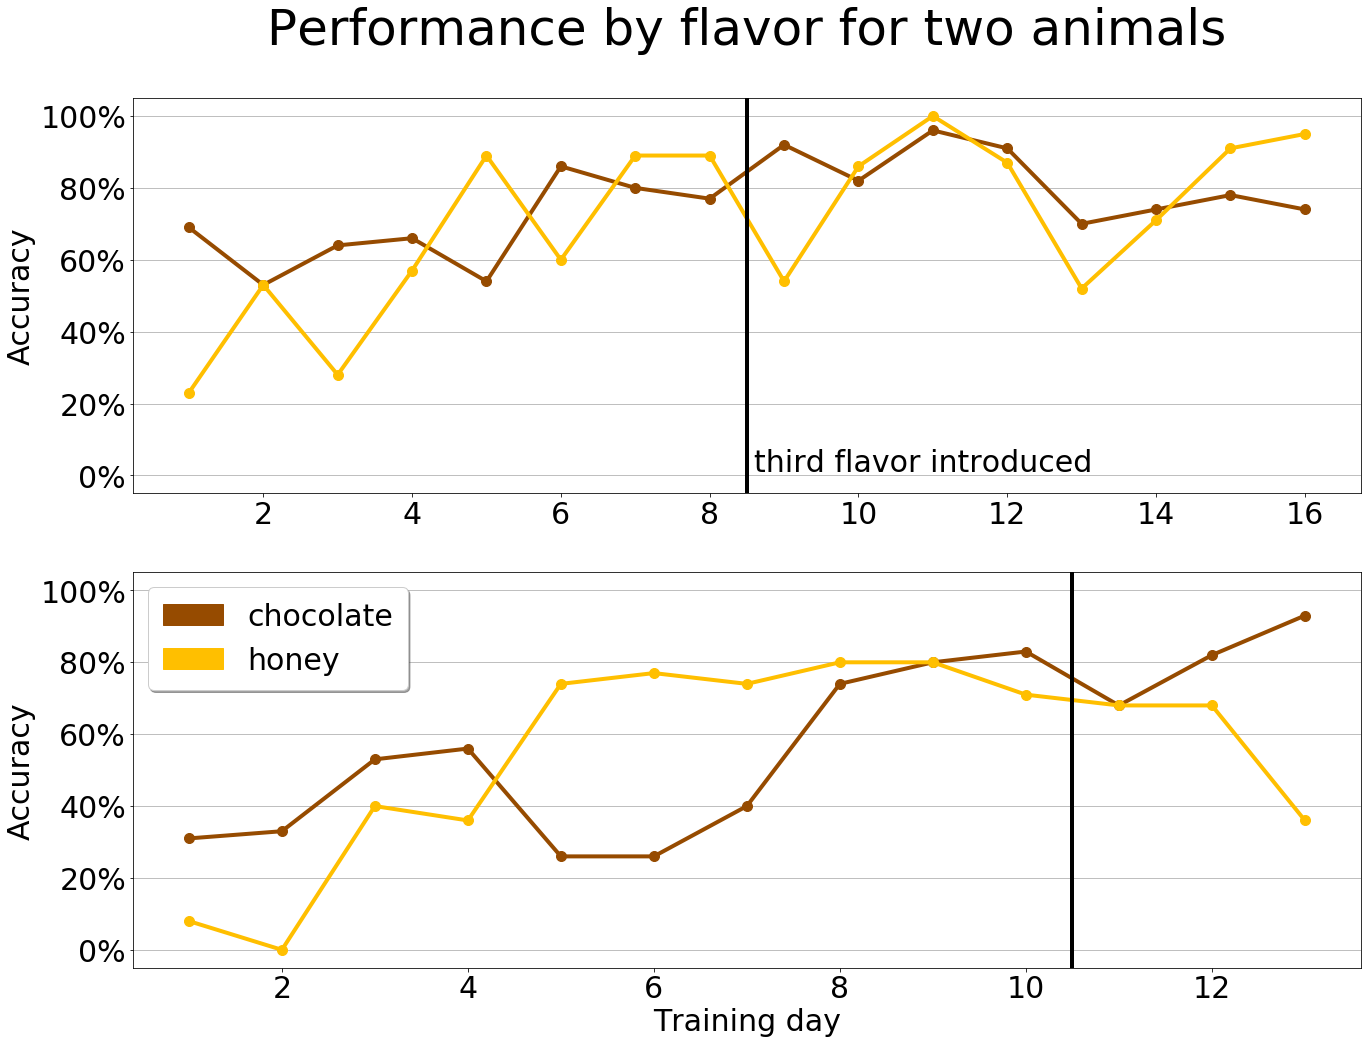

In [19]:
##### Plot accuracy by flavor #####
fig = plt.figure(figsize=(22,16))
# plt.tight_layout()
# fig.suptitle("Performance by flavor", y=0.98, fontsize=30)

### large ###
linefmt = 4 
markerfmt = 10

# Colorscheme
chocolate = '#964B00'
honey = '#FFBF00'

##### JC240 #####
ax1 = fig.add_subplot(211)
ax1.plot(sessions_JC240, flavor_accuracy_JC240[:, 0], color=chocolate, linewidth=linefmt, marker='o', markersize=markerfmt) # chocolate
ax1.plot(sessions_JC240, flavor_accuracy_JC240[:, 1], color=honey, linewidth=linefmt, marker='o', markersize=markerfmt) # honey
ax1.axvline(x=third_flv_sess_JC240-0.5, color='k', linewidth=linefmt) # start of schema learning
ax1.text(third_flv_sess_JC240-0.4, 1, "third flavor introduced", fontsize=30)

##### Formatting large #####
ax1.set_title("Performance by flavor for two animals", fontsize=50, y=1.12)
ax1.tick_params(labelsize=30)
# ax1.set_xlabel("Training day", fontsize=30)
ax1.set_ylabel("Accuracy", fontsize=30)
# ax.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax1.set_ylim(-5,105)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax1.yaxis.grid()
# ax.margins(x=0.05)

##### JC258 #####
ax2 = fig.add_subplot(212)
ax2.plot(sessions_JC258, flavor_accuracy_JC258[:, 0], color=chocolate, linewidth=linefmt, marker='o', markersize=markerfmt) # chocolate
ax2.plot(sessions_JC258, flavor_accuracy_JC258[:, 1], color=honey, linewidth=linefmt, marker='o', markersize=markerfmt) # honey
ax2.axvline(x=third_flv_sess_JC258-0.5, color='k', linewidth=linefmt) # start of schema learning


##### Formatting large #####
# ax2.set_title("JC258", fontsize=23,y=1.03)
ax2.tick_params(labelsize=30)
ax2.set_xlabel("Training day", fontsize=30)
ax2.set_ylabel("Accuracy", fontsize=30)
# ax.xaxis.set_major_locator(mtick.MultipleLocator(1))
ax2.set_ylim(-5,105)
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax2.yaxis.grid()
# ax.margins(x=0.05)

# ##### Formatting #####
# ax1.set_title("Performance for two paired associations", fontsize=26,y=1.03)
# ax1.tick_params(labelsize=15)
# ax1.set_xlabel("Training day", fontsize=15)
# ax1.set_ylabel("Accuracy", fontsize=15)
# # ax1.set_xlim(0.5,8.5) # just to align the two subplot x-axes
# ax1.xaxis.set_major_locator(mtick.MultipleLocator(1))
# ax1.set_ylim(-5,100)
# ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
# ax1.yaxis.grid()
# # ax1.margins(x=0.05)

##### Legend #####
chocolate_legend = mpatches.Patch(color=chocolate, label = 'chocolate')
honey_legend = mpatches.Patch(color=honey, label = 'honey')
ax2.legend(handles=[chocolate_legend, honey_legend], loc=2, fontsize=30, fancybox=True, shadow=1, borderpad=0.5)

# plt.show()
timestamp = datetime.datetime.today().strftime("%Y-%m-%d-%H%M%S")
plt.savefig("Performance by flavor JC240 and JC258 small fmt "+timestamp+".png")